<a href="https://colab.research.google.com/github/teju5424/AIES_Lab/blob/main/exno_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6       

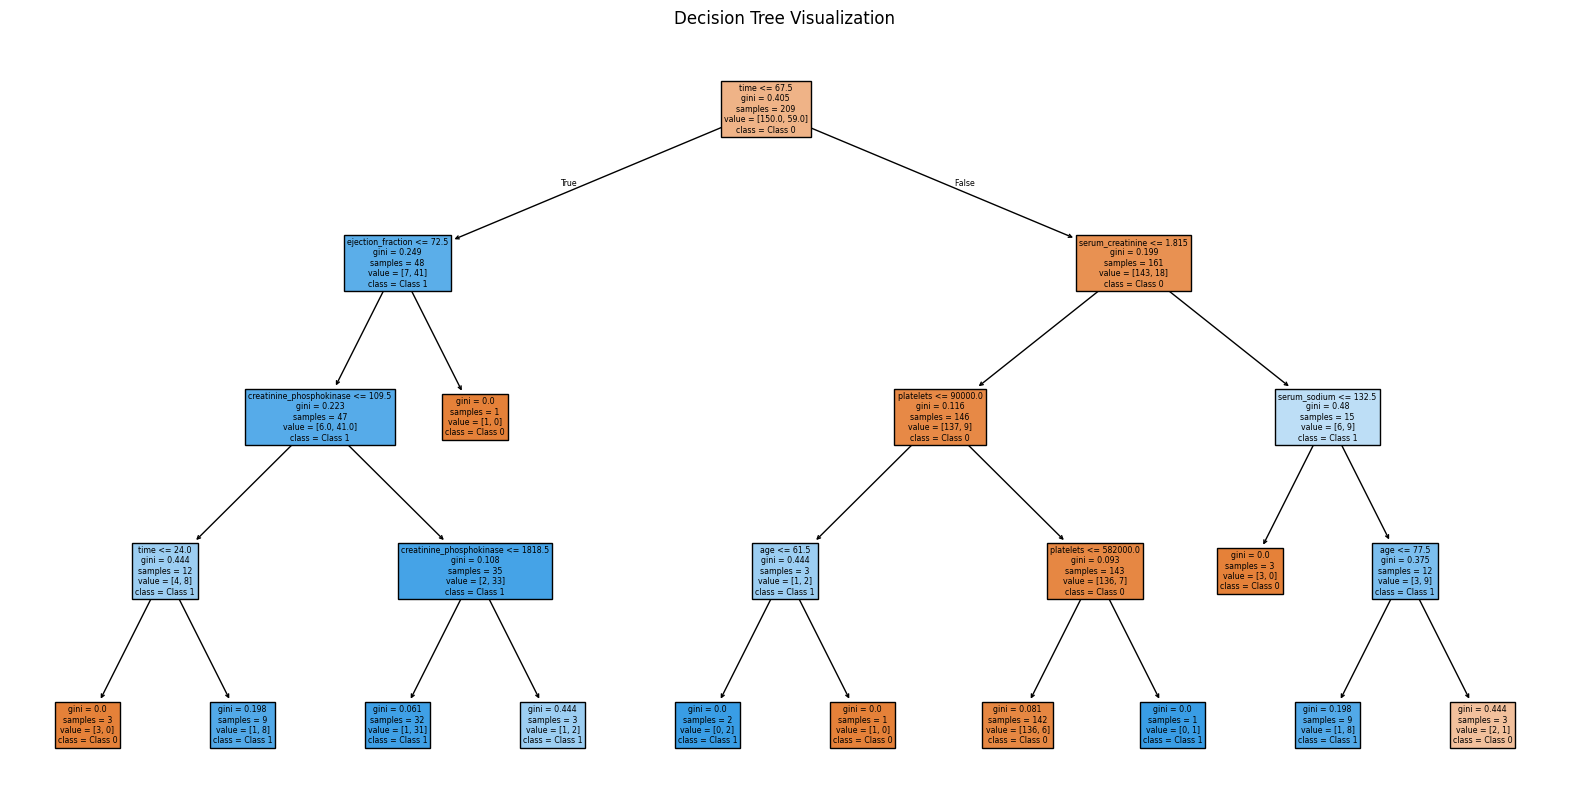


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        53
           1       0.67      0.49      0.56        37

    accuracy                           0.69        90
   macro avg       0.68      0.66      0.66        90
weighted avg       0.69      0.69      0.68        90

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        53
           1       0.82      0.62      0.71        37

    accuracy                           0.79        90
   macro avg       0.80      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90



In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded dataset
file_path = "/content/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Check column names
print("\nColumn Names:")
print(df.columns)

# Assuming the last column is the target, adjust if needed
target_column = df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate Models
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print("\nDecision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Classification Reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))
